In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Height_weight.csv")

In [3]:
df.keys()

Index(['Height', 'Weight'], dtype='object')

In [4]:
df

,Height,Weight
0,1.47,52.21
1,1.50,53.12
2,1.52,54.48
3,1.55,55.84
4,1.57,57.20
5,1.60,58.57
6,1.63,59.93
7,1.65,61.29
8,1.68,63.11
9,1.70,64.47


In [17]:
h = df[["Height"]].values
w = df["Weight"].values

In [18]:
h

array([[1.47],
       [1.5 ],
       [1.52],
       [1.55],
       [1.57],
       [1.6 ],
       [1.63],
       [1.65],
       [1.68],
       [1.7 ],
       [1.73],
       [1.75],
       [1.78],
       [1.8 ],
       [1.83]])

In [19]:
df = df.dropna(how = "all")

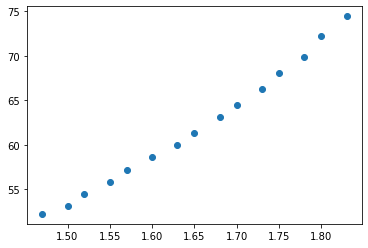

In [20]:
plt.scatter(h,w)
plt.show()

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
model = LinearRegression()

In [23]:
model = model.fit(h,w)

In [24]:
model

LinearRegression()

In [25]:
m = model.coef_
c = model.intercept_
m,c

(array([61.27218654]), -39.06195591884392)

In [26]:
model.predict([[2.89]])

array([138.01466319])

In [27]:
pred = model.predict(h)

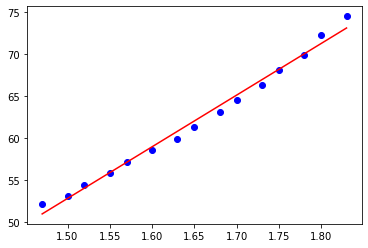

In [28]:
plt.scatter(h,w,c = "blue")
plt.plot(h,pred,c = "red")
plt.show()

In [29]:
df1 = pd.read_csv("loanf.csv")
df1

,Interest.Rate,FICO.Score,Loan.Length,Monthly.Income,Loan.Amount
6,15.31,670,36,4891.67,6000
11,19.72,670,36,3575.00,2000
12,14.27,665,36,4250.00,10625
13,21.67,670,60,14166.67,28000
21,21.98,665,36,6666.67,22000
...,...,...,...,...,...
2472,7.90,770,36,5166.67,19000
2481,6.03,760,36,5000.00,10000
2482,6.62,810,36,9250.00,27000
2486,10.75,765,36,7083.33,25000


In [30]:
model.predict([[4.5]])

array([236.66288352])

In [32]:
NewDf = pd.DataFrame({
    "Real":w,
    "Predicted":pred
})

In [33]:
NewDf

,Real,Predicted
0,52.21,51.008158
1,53.12,52.846324
2,54.48,54.071768
3,55.84,55.909933
4,57.20,57.135377
5,58.57,58.973543
6,59.93,60.811708
7,61.29,62.037152
8,63.11,63.875317
9,64.47,65.100761


In [35]:
##Finding the ACCURACY
from sklearn.metrics import r2_score
r2_score(w,pred)*100

98.91969224457968

# Multi Linear Regression

In [36]:
loan = pd.read_csv("loanf.csv")

In [37]:
loan.keys()

Index(['Interest.Rate', 'FICO.Score', 'Loan.Length', 'Monthly.Income',
       'Loan.Amount'],
      dtype='object')

In [ ]:
##lets take Interest Rate as the dependent variable and FICO score and Loan Amount as Independent

In [47]:
x = loan[["FICO.Score","Loan.Amount"]].values
y = loan["Interest.Rate"].values

In [48]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x,y)

LinearRegression()

In [49]:
regressor.coef_

array([-0.08844242,  0.00021075])

In [50]:
regressor.intercept_

72.88279831676893

In [51]:
pred_loan = regressor.predict(x)

In [ ]:
#Interact Panel

In [61]:
def predict_loan(FICO,amt):
    out = regressor.predict([[FICO,amt]])
    out = out[0]
    print("With the FICO score of {FICO} and Loan Amount of {amt}, the interest rate is {interest}".format(FICO = FICO,
                                                                                                          amt = amt,
                                                                                                          interest = str(out)[:6]))

In [62]:
predict_loan(200,155)

With the FICO score of 200 and Loan Amount of 155, the interest rate is 55.226


In [63]:
from ipywidgets import interact

In [64]:
interact(predict_loan,FICO = (200,1500),amt = (5000,200000))

interactive(children=(IntSlider(value=850, description='FICO', max=1500, min=200), IntSlider(value=102500, des…

<function __main__.predict_loan(FICO, amt)>